# One-dimensional Lagrange Interpolation

The problem of interpolation or finding the value of a function at an arbitrary point $X$ inside a given domain, provided we have discrete known values of the function inside the same domain is at the heart of the finite element method. In this notebooke we use Lagrange interpolation where the approximation $\hat f(x)$ to the function $f(x)$ is built like:

\begin{equation}
\hat f(x)={L^I}(x)f^I
\end{equation}

In the expression above $L^I$ represents the $I$ Lagrange Polynomial of order $n-1$ and $f^1, f^2,,...,f^n$ are the $n$ known values of the function. Here we are using the summation convention over the repeated superscripts.

The $I$ Lagrange polynomial is given by the reursive expression:

\begin{equation}
{L^I}(x)=\prod_{J=1, J \ne I}^{n}{\frac{{\left( {x - {x^J}} \right)}}{{\left( {{x^I} - {x^J}} \right)}}} 
\end{equation}

in the domain $x\in[-1.0,1.0]$.

We wish to interpolate the function $ f(x)=x^3+4x^2-10 $ assuming we know its value at points $x=-1.0$, $x=1.0$ and $x=0.0$.

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy import init_printing
init_printing()

First we use a function to generate the Lagrage polynomial of order $order$ at point $i$

In [2]:
def LagrangPoly(x,order,i,xi=None):
    if xi==None:
        xi=symbols('x:%d'%(order+1))
    index = range(order+1)
    index.pop(i)
    return prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

we now define the function $ f(x)=x^3+4x^2-10 $:

In [3]:
fx = lambda x: x**3+4.0*x**2-10.0

In [4]:
x= symbols('x')
npts = 200
xx = np.linspace(-1, 1, npts)
yy = np.zeros((npts))
zz = np.zeros((npts))
fd = np.array([fx(-1.0), fx(1.0) ,fx(0.0)])

And obtain the Lagrange polynomials using:


In [5]:
pol = []
pol.append(simplify(LagrangPoly(x, 2, 0, [-1,1,0])))
pol.append(simplify(LagrangPoly(x, 2, 1, [-1,1,0])))
pol.append(simplify(LagrangPoly(x, 2, 2, [-1,1,0])))

In [6]:
print pol[0]
print pol[1]
print pol[2]

x*(x - 1)/2
x*(x + 1)/2
-x**2 + 1


which are shown in the following plot

In [6]:
%matplotlib inline

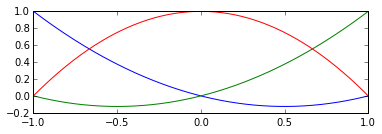

In [7]:
plt.subplot(2,1,1)
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])
    plt.plot(xx, yy)

In [ ]:
plt.show()

Now we plot the complete approximating polynomial, the actual function and the points where the function was known.

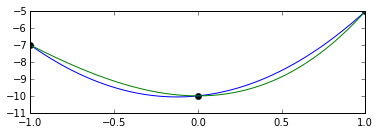

In [8]:
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])]) \
            + fd[2]*pol[2].subs([(x, xx[i])])

plt.subplot(2,1,2)
for i in range(npts):
    zz[i]=fx(xx[i])
plt.plot([-1, 1, 0], fd, 'ko')
plt.plot(xx, yy)
plt.plot(xx, zz)
plt.show()